# Lecture 2 - text data classification 

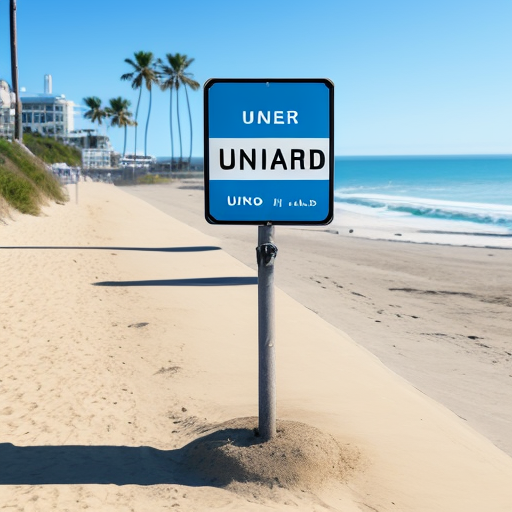

 - lots of preprocessing 
 - simple examples

Language is the tool we use to communicate, think, store knowledge. Its the key! 

Text data is a very hard data type to work with : 

- High Dimensionality: Text data, especially when tokenized into individual words or n-grams, can lead to a very high-dimensional feature space. This can make models computationally expensive and increase the risk of overfitting.

- Sparsity: Most text documents will only contain a tiny fraction of the words in a language, resulting in many zeros in the feature representation. This sparsity can make certain modeling techniques inefficient or infeasible.

- Ambiguity and Polysemy: Many words in languages have multiple meanings based on context. For example, the word "bank" can mean the side of a river or a financial institution.

- Synonymy: Different words can have similar meanings, like "big" and "large". This poses a challenge in identifying the true intent or sentiment behind texts.

- Complex Dependencies: The meaning of a word can depend on its surrounding words, or even words much earlier in a text. Capturing long-term dependencies can be challenging.

- Variability: Texts can express the same idea in myriad ways due to differences in style, tone, or choice of vocabulary.

- Noisy Data: Text data, especially from sources like social media, can be noisy. They may contain typos, slang, non-standard grammar, or emoticons.

- Handling of Out-of-Vocabulary (OOV) Words: In real-world applications, it's common to encounter words not seen during training. Handling OOV words is challenging.

- Cultural and Temporal Dynamics: The way language is used can change based on cultural or temporal contexts, making it hard to generalize models across different cultures or time periods.

- Data Labeling Challenges: For supervised learning, text data may require manual labeling. This can be time-consuming, expensive, and subjective. Inter-annotator disagreement can also be an issue.

- Bias and Fairness: Text data, especially from the web, can contain biases. Machine learning models trained on such data can inherit and amplify these biases, leading to unfair or prejudiced predictions.

- Scalability: Processing and analyzing large text corpora require significant computational resources and efficient algorithms.

- Multilingual Challenges: Building models that work across multiple languages or even dialects can be challenging, especially when resources for certain languages are scarce.

We want to work with numeric data, as always. Images are easier, you have number associated to pixel values. There are multiple ways, RGB, HSV... but still it is quite intuitive. 

With text is harder, any Idea on how to encode text into numbers? 

### Preprocessing

In [1]:
text = "."

# Lowercasing
lowercased_text = text.lower()
print("Lowercased Text:", lowercased_text)

# Tokenization
tokens = lowercased_text.split()
print("Tokens:", tokens)

Lowercased Text: .
Tokens: ['.']


In [2]:
#remove punctuations
import string

text = "Hello, World! who's speaking? Ah, it's you!"
clean_text = text.translate(str.maketrans('', '', string.punctuation))
print("Cleaned Text:", clean_text)

Cleaned Text: Hello World whos speaking Ah its you


nltk stands for the Natural Language Toolkit. It's a leading platform for building Python programs to work with human language data (text)

In [5]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fmerizzi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
from nltk.corpus import stopwords
text = "This is an example of removing stopwords from a sentence."
tokens = text.split()
filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
print("Filtered Tokens:", filtered_tokens)

Filtered Tokens: ['example', 'removing', 'stopwords', 'sentence.']


In [7]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
text = "running runner runs run"
tokens = text.split()
stemmed_tokens = [ps.stem(token) for token in tokens]
print("Stemmed Tokens:", stemmed_tokens)

Stemmed Tokens: ['run', 'runner', 'run', 'run']


In [41]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
text = "geese mice swimming swam"
tokens = text.split()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
print("Lemmatized Tokens:", lemmatized_tokens)

[nltk_data] Downloading package wordnet to /home/faster/nltk_data...


Lemmatized Tokens: ['goose', 'mouse', 'swimming', 'swam']


In [42]:
from nltk import bigrams

text = "Natural language processing is fun."
tokens = text.split()
bigram_list = list(bigrams(tokens))
print("Bigrams:", bigram_list)

Bigrams: [('Natural', 'language'), ('language', 'processing'), ('processing', 'is'), ('is', 'fun.')]


### Regular expressions? Regex?

Regex are used primarily for string matching and manipulation, they offer a concise and flexible means to identify strings of text, such as specific words or patterns.

Regex example:  ^\d{5}$

    .: Matches any character except a newline.
    ^: Matches the start of the string.
    $: Matches the end of the string.
    *: Matches 0 or more repetitions of the preceding character or group.
    +: Matches 1 or more repetitions of the preceding character or group.
    ?: Matches 0 or 1 repetition of the preceding character or group.

    \d: Matches any digit (0-9).
    \D: Matches any non-digit character.
    \w: Matches any word character (alphanumeric characters plus underscore).
    \W: Matches any non-word character.
    \s: Matches any whitespace character (spaces, tabs, line breaks).
    \S: Matches any non-whitespace character.

    {n}: Matches exactly n occurrences.
    {n,}: Matches n or more occurrences.
    {n,m}: Matches between n and m occurrences.

In [43]:
import re

text = "Hello, World!"
match = re.search("World", text)
if match:
    print("Found:", match.group())

Found: World


In [44]:
text = "The rain in Spain."
match = re.search("[RS]pain", text)
if match:
    print("Found:", match.group())

Found: Spain


In [45]:
text = "Order number: 12345"
match = re.search("\d+", text)  # + indicates one or more
if match:
    print("Found:", match.group())

Found: 12345


In [50]:
text = "Hello"
if re.match("^Hello", text):  # ^ matches the start
    print("Starts with 'Hello'")
if re.search("Hello$", text):  # $ matches the end
    print("Ends with 'Hello'")


Starts with 'Hello'
Ends with 'Hello'


In [51]:
text = "Contact us at contact@example.com"
match = re.search("[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,4}", text)
if match:
    print("Found email:", match.group())

Found email: contact@example.com


In [52]:
text = "blue, red, green"
replaced_text = re.sub("blue", "yellow", text)
print(replaced_text)  # "yellow, red, green"


yellow, red, green


In [53]:
text = "apple,banana,orange"
fruits = re.split(",", text)
print(fruits)  # ['apple', 'banana', 'orange']


['apple', 'banana', 'orange']


In [ ]:
text = "HELLO"
match = re.search("hello", text, re.IGNORECASE)
if match:
    print("Found:", match.group())

### Encoding text
transforming text into numbers

Label encoding, the simplest, we used last lecture to encode the class names. This is more or less its only use. 

In [22]:
from sklearn.preprocessing import LabelEncoder

labels = ["cat", "dog", "bird", "cat", "bird"]
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
print(encoded_labels) 

[1 2 0 1 0]


Bag of Words Encoding is essentially a histogram of word frequencies in a text document.

How it works: For each document or text sample, count the number of occurrences of each word and represent the document as this count vector.

When to use it:

    Document classification: BoW is popular for tasks like email spam classification or sentiment analysis, where the occurrence of certain words can be a strong indicator of the class.
    Texts with different lengths: Since BoW leads to fixed-length vectors (the size of the vocabulary), it's useful when dealing with texts of varying lengths.
    Simple models: For models like Naive Bayes, BoW can be very effective.

Cons:

    Loses all information about word order. "This is good, not bad" and "This is bad, not good" would have the same representation.
    Like one-hot encoding, BoW can also lead to high-dimensional data with large vocabularies.
    Doesn't capture semantic relationships between words.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "Hello there this is the machine learning course.",
    "Welcome to the machine learning class."
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

print("Vocabulary:", vectorizer.get_feature_names_out())
print("BoW Representation:\n", X.toarray())

Vocabulary: ['class' 'course' 'hello' 'is' 'learning' 'machine' 'the' 'there' 'this'
 'to' 'welcome']
BoW Representation:
 [[0 1 1 1 1 1 1 1 1 0 0]
 [1 0 0 0 1 1 1 0 0 1 1]]


For each word in a document, One-Hot Encoding represents it as a vector where only one position is '1' (the position corresponding to that word's index in the vocabulary), and all other positions are '0'.

How it works: In one-hot encoding, for each unique word in the data, you create a new binary feature. A word occurrence is marked by a 1 in its corresponding feature and 0 in all others.

When to use it:

    Categorical data with low cardinality: If you have categorical data that isn't text (e.g., colors: red, green, blue), one-hot encoding is often a good choice because the data doesn't have high cardinality.
    Sequential models: For models where the sequence of data matters (like in RNNs), one-hot encoding can preserve word order.

Cons:

    Can lead to very high-dimensional data when dealing with large vocabularies in text data, which can be memory-intensive.
    Doesn't capture semantic meaning of words or the relationship between words.

In [28]:
from sklearn.preprocessing import OneHotEncoder

words = [["hello"], ["this"], ["is"], ["the"], ["machine"], ["learning"], ["course"]]

encoder = OneHotEncoder(sparse_output=False)
encoded_words = encoder.fit_transform(words)

print("One-Hot Encoded Words:\n", encoded_words)

One-Hot Encoded Words:
 [[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


    Nature of the Problem: For document classification problems, BoW might be more appropriate. For tasks that need to understand the context or sequence, like machine translation, other encodings like embeddings might be more appropriate.
    Size of Vocabulary: If your dataset has a vast vocabulary, BoW can lead to very large vectors. One-hot encoding would also result in large vectors but might be more manageable if you're looking at words in context (like in sequences) rather than entire documents.
    Model Complexity: Simpler models might benefit from the simplicity of BoW. More complex models, especially deep learning models, often benefit from other techniques like embeddings.
    Semantic Meaning: If capturing the semantic meaning of words is important, consider moving beyond one-hot and BoW to techniques like word embeddings (e.g., Word2Vec, GloVe).

In [27]:
from gensim.models import Word2Vec

sentences = [
    ["machine", "learning", "is", "amazing"],
    ["natural", "language", "processing", "is", "fun"],
    ["python", "is", "a", "popular", "language"]
]

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
vector = model.wv['natural']  # Get vector for 'machine'
print(vector)

[ 8.1681199e-03 -4.4430327e-03  8.9854337e-03  8.2536647e-03
 -4.4352221e-03  3.0310510e-04  4.2744912e-03 -3.9263200e-03
 -5.5599655e-03 -6.5123225e-03 -6.7073823e-04 -2.9592158e-04
  4.4630850e-03 -2.4740540e-03 -1.7260908e-04  2.4618758e-03
  4.8675989e-03 -3.0808449e-05 -6.3394094e-03 -9.2608072e-03
  2.6657581e-05  6.6618943e-03  1.4660227e-03 -8.9665223e-03
 -7.9386048e-03  6.5519023e-03 -3.7856805e-03  6.2549924e-03
 -6.6810320e-03  8.4796622e-03 -6.5163244e-03  3.2880199e-03
 -1.0569858e-03 -6.7875278e-03 -3.2875966e-03 -1.1614120e-03
 -5.4709399e-03 -1.2113475e-03 -7.5633135e-03  2.6466595e-03
  9.0701487e-03 -2.3772502e-03 -9.7651005e-04  3.5135616e-03
  8.6650876e-03 -5.9218528e-03 -6.8875779e-03 -2.9329848e-03
  9.1476962e-03  8.6626766e-04 -8.6784009e-03 -1.4469790e-03
  9.4794659e-03 -7.5494875e-03 -5.3580985e-03  9.3165627e-03
 -8.9737261e-03  3.8259076e-03  6.6544057e-04  6.6607012e-03
  8.3127534e-03 -2.8507852e-03 -3.9923131e-03  8.8979173e-03
  2.0896459e-03  6.24894

The state of the art, pretrained Bert tokenizer. This is what I would use if I wanted to encode text! I cannot execute this here I have no torch :(, but you have it on colab!

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

text = "Hello, world!"
inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
with torch.no_grad():
    outputs = model(**inputs)
    
# 'outputs' now contains the representations for the text
print(outputs['last_hidden_state'])

## Classification

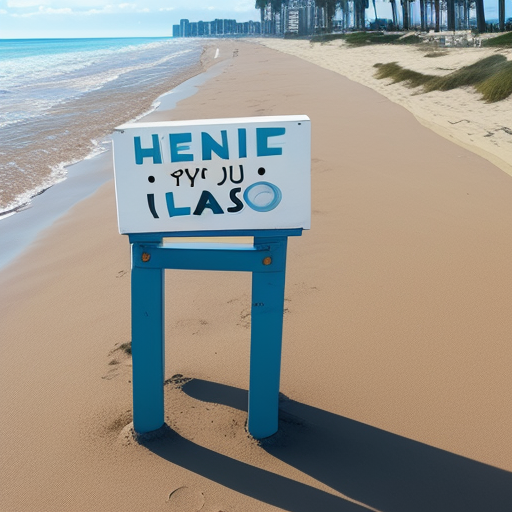

In [59]:
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/fmerizzi/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [76]:
import pandas as pd

In [77]:
reviews = []
for fileid in movie_reviews.fileids():
    tag, filename = fileid.split('/')
    reviews.append((filename, tag, movie_reviews.raw(fileid)))

df = pd.DataFrame(reviews, columns=['filename', 'tag', 'text'])

In [82]:
df["tag"].shape

(2000,)

In [12]:
from sklearn.datasets import fetch_20newsgroups

In [13]:
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']

In [14]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [65]:
type(twenty_train.data)

list

In [15]:
len(twenty_train.data)

2257

In [16]:
twenty_train.data[0]

'From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n'

In [18]:
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [19]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [20]:
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

In [21]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(2257, 35788)

In [25]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

In [26]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [27]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


In [31]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [32]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test',
    categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.8348868175765646

In [34]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted,
    target_names=twenty_test.target_names))




metrics.confusion_matrix(twenty_test.target, predicted)

                        precision    recall  f1-score   support

           alt.atheism       0.95      0.80      0.87       319
         comp.graphics       0.87      0.98      0.92       389
               sci.med       0.94      0.89      0.91       396
soc.religion.christian       0.90      0.95      0.93       398

              accuracy                           0.91      1502
             macro avg       0.91      0.91      0.91      1502
          weighted avg       0.91      0.91      0.91      1502



array([[256,  11,  16,  36],
       [  4, 380,   3,   2],
       [  5,  35, 353,   3],
       [  5,  11,   4, 378]])

In [42]:
from sklearn.linear_model import LogisticRegression
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])

text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())])

In [ ]:
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

In [40]:
from sklearn import svm

In [43]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', svm.SVC()),
])

text_clf.fit(twenty_train.data, twenty_train.target)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC())])

In [ ]:
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

In [44]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': (1e-2, 1e-3),
}

In [47]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

text_clf.fit(twenty_train.data, twenty_train.target)
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.9101198402130493

In [48]:
gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)

In [49]:
gs_clf = gs_clf.fit(twenty_train.data[:400], twenty_train.target[:400])

In [52]:
gs_clf.best_score_

0.9175000000000001

In [51]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.001
tfidf__use_idf: True
vect__ngram_range: (1, 1)


In [50]:
gs_clf.cv_results_

{'mean_fit_time': array([0.15598822, 0.4634263 , 0.12453456, 0.36748967, 0.09304676,
        0.37393603, 0.09389501, 0.30454354]),
 'std_fit_time': array([0.00623815, 0.00999343, 0.02958139, 0.02368754, 0.00574263,
        0.01613152, 0.00407473, 0.0342618 ]),
 'mean_score_time': array([0.01733146, 0.03975954, 0.01569467, 0.03613462, 0.01676855,
        0.03441443, 0.01707463, 0.0206018 ]),
 'std_score_time': array([0.00128877, 0.00552005, 0.00270185, 0.00424706, 0.00248393,
        0.00529947, 0.0014485 , 0.00215173]),
 'param_clf__alpha': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.001, 0.001, 0.001, 0.001],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_tfidf__use_idf': masked_array(data=[True, True, False, False, True, True, False, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_vect__ngram_range'